In [1]:
import numpy as np
from TDD2.TDD import Ini_TDD,Clear_TDD,set_index_order,get_tdd,Index
from TDD2.TDD_Q import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs
from TDD2.TDD_Q import reshape as reshape2
from TDD2.TN import Tensor,TensorNetwork
import time
from qiskit import QuantumCircuit
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\__init__.py:64: RuntimeWarning: Could not import the Aer provider from the qiskit-aer package. Install qiskit-aer or check your installation.
  RuntimeWarning)


In [2]:
path='Benchmarks/'
n=3
t_start=time.time()
file_name='A.qasm'
cir=QuantumCircuit.from_qasm_file(path+file_name)

# tn,indices=cir_2_tn(cir)
# Ini_TDD(indices)
# tdd=tn.cont()[0]
# print(time.time()-t_start)
# print(tdd.node_number())
# print(len(cir.data))

# tdd.show()

{-1: -1, 0: 'y2', 1: 'y1', 2: 'y0', 3: 'x2', 4: 'x1', 5: 'x0', 6: 'c_2', 7: 'c_1', 8: 'c_0'}
0.08903646469116211
28


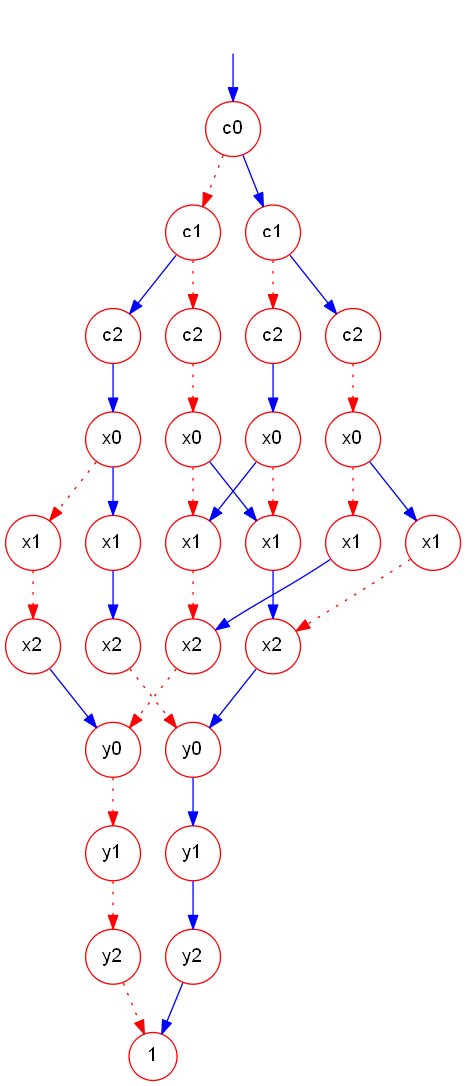

In [3]:
path='Benchmarks/'
n=3
t_start=time.time()
file_name='DQC_bitflip_code2.qasm'
# file_name='DQC_PE_7.qasm'
cir=QuantumCircuit.from_qasm_file(path+file_name)
tn,indices=cir_2_tn(cir)
ini0=np.array([1,0])
for k in range(3):
    ts=Tensor(ini0,[Index('x'+str(3+k))])
    tn.tensors.append(ts)

Ini_TDD(indices)
tdd=tn.cont(optimizer='tree_decomposition')[0]
print(tdd.key_2_index)
for k in tdd.key_2_index:
    if not tdd.key_2_index[k]==-1 and tdd.key_2_index[k][0]=='c':
        tdd.key_2_index[k]='c'+tdd.key_2_index[k][2]
print(time.time()-t_start)
print(tdd.node_number())
tdd.show()


True
0.19664335250854492
161


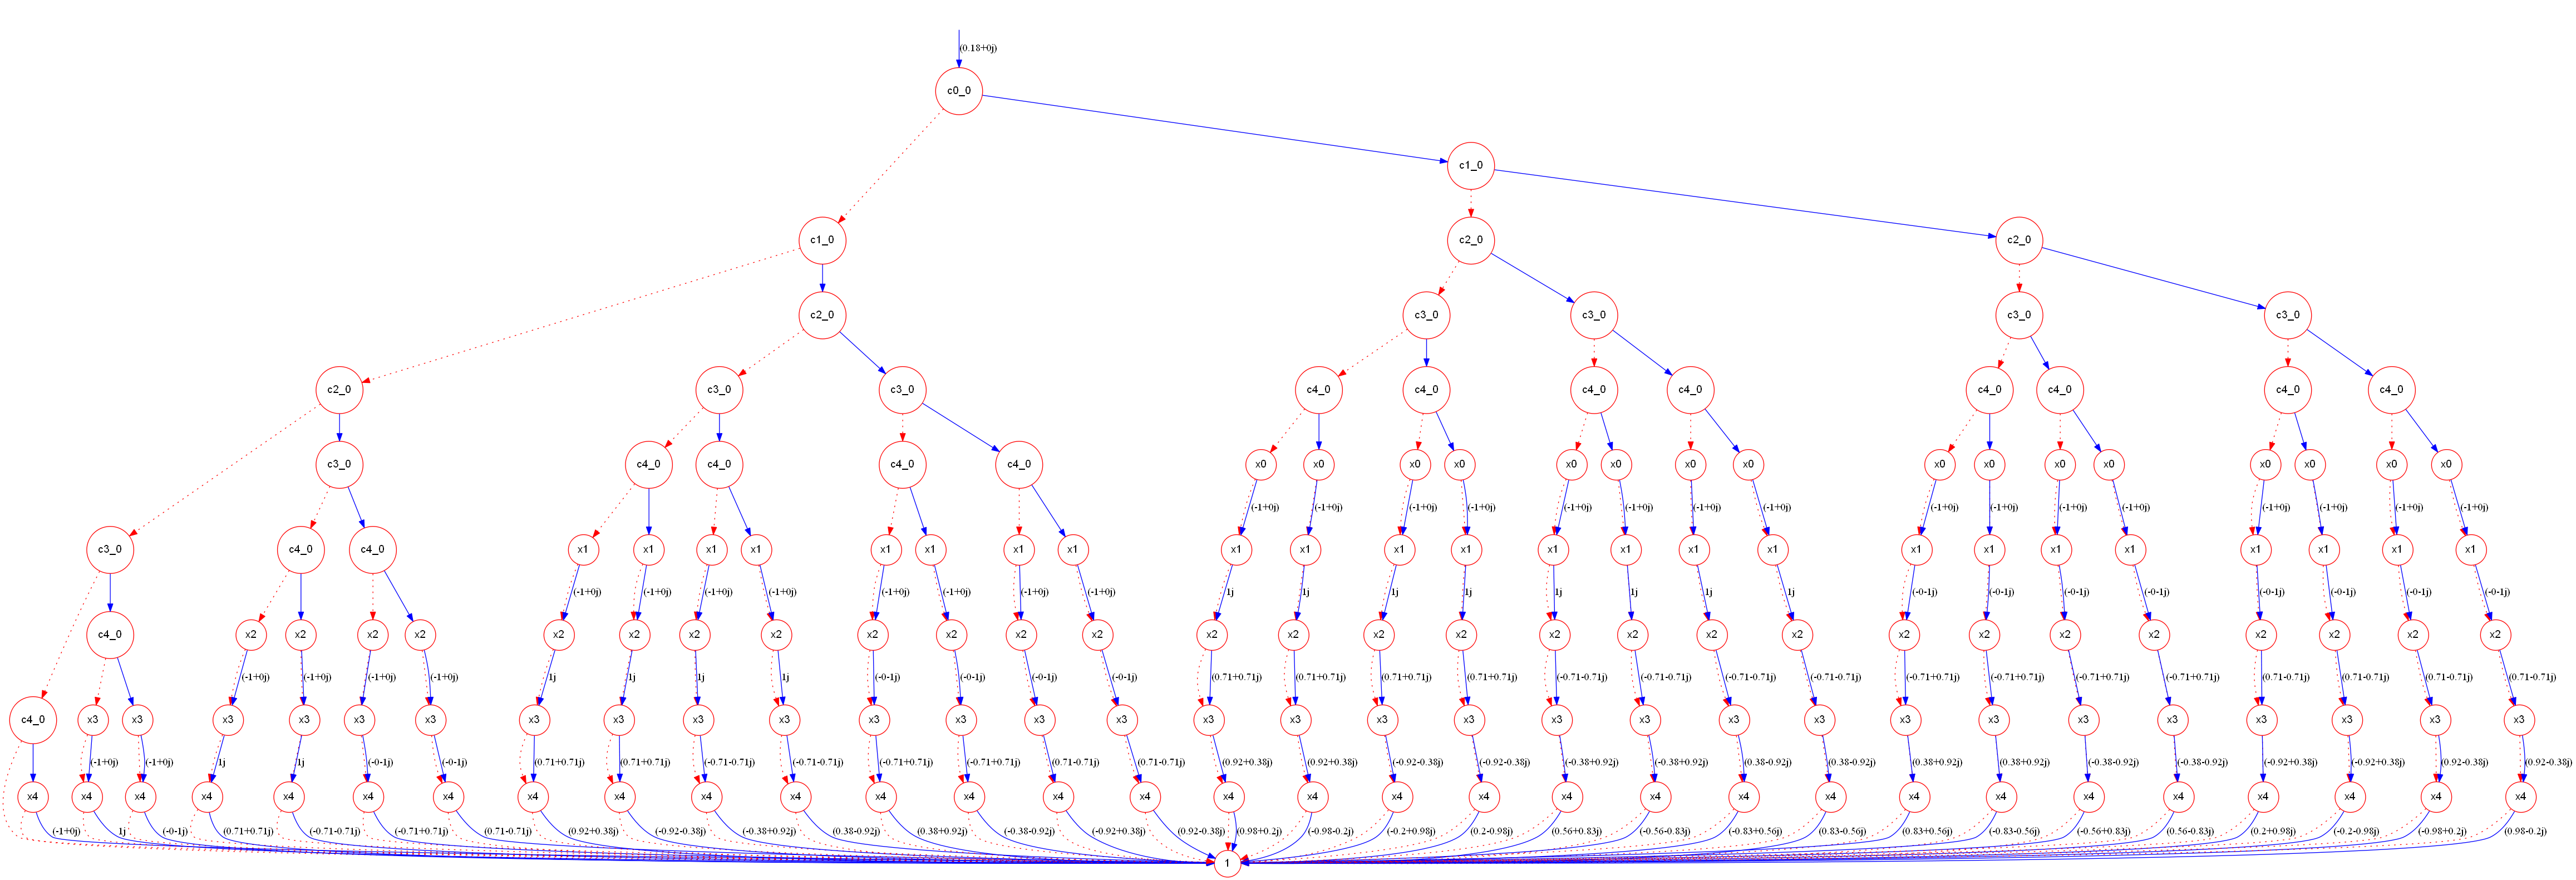

In [4]:
path='Benchmarks2/'
n=5
t_start=time.time()
file_name='DQC_qft_'+str(n)+'.qasm'
file_name2='DQC_qft_'+str(n)+'_1.qasm'
cir1=QuantumCircuit.from_qasm_file(path+file_name)
cir2=QuantumCircuit.from_qasm_file(path+file_name2)
tn1,indices=cir_2_tn(cir1)
tn2,indices2=cir_2_tn(cir2)
for k in indices2:
    if not k in indices:
        indices.append(k)
# indices.reverse()
Ini_TDD(indices)
tdd1=tn1.cont(optimizer='tree_decomposition')[0]
tdd2=tn2.cont(optimizer='tree_decomposition')[0]
print(tdd1==tdd2)
print(time.time()-t_start)
print(tdd1.node_number())
tdd1.show()

In [5]:
# path='Benchmarks2/'
# # 'DQC_qft_5','DQC_qft_6','DQC_qft_7','DQC_qft_8','DQC_qft_9','DQC_qft_10',
# file_names=['DQC_qft_11','DQC_qft_12','DQC_qft_13','DQC_qft_14','DQC_qft_15','DQC_PE_7','DQC_PE_8','DQC_PE_9','DQC_bitflip_code','DQC_phaseflip_code','DQC_teleportation','DQC_state_injection_S','DQC_state_injection_T']
# for f in file_names[10:]:
#     t_start=time.time()
#     file_name=f+'.qasm'
#     file_name2=f+'_1.qasm'
#     print(file_name)
#     cir1=QuantumCircuit.from_qasm_file(path+file_name)
#     cir2=QuantumCircuit.from_qasm_file(path+file_name2)
#     tn1,indices1=cir_2_tn(cir1)
#     tn2,indices2=cir_2_tn(cir2)
#     for k in indices2:
#         if not k in indices1:
#             indices1.append(k)
# #     indices1.reverse()
# #     print(indices1)
# #     break
#     Ini_TDD(indices1)
#     tdd1=tn1.cont(optimizer='tree_decomposition',max_node=True)[0]
#     tdd2=tn2.cont(optimizer='tree_decomposition',max_node=True)[0]
#     print(tdd1==tdd2)
#     print(tdd1.node_number())
#     print(time.time()-t_start)    
# # tdd1.show()

In [6]:
# path='Benchmarks2/'
# path='Gen_QFT/'
# excel_path = 'data/data_5_16_2022.xlsx'


# data=['Benchmarks','qubits','gate1','gate2','res','time','nodes1','node2','max_nodes']        
# data=np.array(data).reshape(1,len(data))
# df = pd.read_excel(excel_path, header=None)
# ds = pd.DataFrame(data)
# df = df.append(ds, ignore_index=True)
# df.to_excel(excel_path, index=False, header=False)        

# file_names=['DQC_qft_11','DQC_qft_12','DQC_qft_13','DQC_qft_14','DQC_qft_15','DQC_qft_16','DQC_qft_17','DQC_qft_18','DQC_qft_19','DQC_qft_20']
# file_names=['DQC_qft_21']#,'DQC_qft_22'
# # file_names=['DQC_PE_7','DQC_PE_8','DQC_PE_9','DQC_PE_10','DQC_PE_11','DQC_PE_12','DQC_PE_13']
# # file_names=['DQC_PE_13','DQC_PE_14','DQC_PE_15','DQC_PE_16']
# # file_names=['DQC_bitflip_code','DQC_phaseflip_code','DQC_teleportation','DQC_state_injection_S','DQC_state_injection_T']
# file_names=['DQC_PE_14']
# for f in file_names:
#     data = []
#     file_name=f+'.qasm'
#     file_name2=f+'_1.qasm'
#     print('file_name:',file_name)
#     data.append(file_name)
#     cir1=QuantumCircuit.from_qasm_file(path+file_name)
#     cir2=QuantumCircuit.from_qasm_file(path+file_name2)    
#     data.append(len(cir1._qubits))
#     data.append(len(cir1.data))
#     data.append(len(cir2.data))
#     tn1,indices1=cir_2_tn(cir1)
#     tn2,indices2=cir_2_tn(cir2)
#     t_start=time.time()
#     for k in indices2:
#         if not k in indices1:
#             indices1.append(k)
#     Ini_TDD(indices1)
#     tdd1,mx0=tn1.cont(optimizer='tree_decomposition',max_node=True)
#     tdd2,mx1=tn2.cont(optimizer='tree_decomposition',max_node=True)
#     print(tdd1==tdd2)
    
#     t=time.time()-t_start
#     print(t)
    
#     data.append(str(tdd1==tdd2))
#     data.append(t)
#     data.append(tdd1.node_number())
#     data.append(tdd2.node_number())
#     data.append(max(mx0,mx1))


#     data=np.array(data).reshape(1,len(data))
#     df = pd.read_excel(excel_path, header=None)
#     ds = pd.DataFrame(data)
#     df = df.append(ds, ignore_index=True)
#     df.to_excel(excel_path, index=False, header=False)
#     print('---------------------')

True
26.82156467437744
19


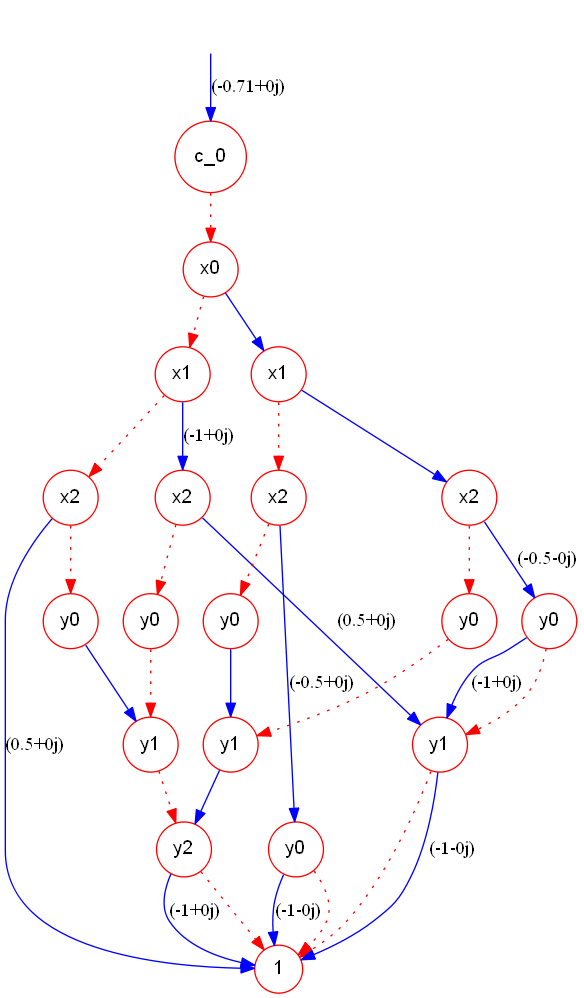

In [10]:
path='Benchmarks2/'

file_name='Grover_1.qasm'
file_name2='Grover_2.qasm'
index_set=['y3']
v=np.array([1,0])
input_state1={3:v}
input_state2={3:v}

cir1= QuantumCircuit.from_qasm_file(path+file_name)
cir2= QuantumCircuit.from_qasm_file(path+file_name2)

tn1,indices=cir_2_tn(cir1)
tn2,indices2=cir_2_tn(cir2)
for k in indices2:
    if not k in indices:
        indices.append(k)
U0=np.array([1,0])        
ts=Tensor(U0,[Index('x3')],'in',[2])
tn1.tensors.insert(0,ts)
tn2.tensors.insert(0,ts)
Ini_TDD(indices)
tdd1=tn1.cont(optimizer='tree_decomposition')[0]
tdd2=tn2.cont(optimizer='tree_decomposition')[0]
print(tdd1==tdd2)
print(time.time()-t_start)
print(tdd1.node_number())
tdd1.show()